In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# load data
df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv')
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,NaN,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,NaN,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,NaN,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,NaN,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,NaN,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [2]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

## Observation: 
### I noticed that numerous features in the dataset contain numerical values stored as strings instead of integers or floats. Before proceeding, we need to convert these string values to float values.

In [3]:
# convert string to float
# Replace the specified columns with actual names to convert to float
columns_to_convert = [
    'ForecastWindProduction', 'SystemLoadEA', 'SMPEA', 'ORKTemperature', 
    'ORKWindspeed', 'CO2Intensity', 'ActualWindProduction', 
    'SystemLoadEP2', 'SMPEP2'
]

# Convert columns to float, handling any errors
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Check the data types to ensure conversion
print(df.dtypes)

DateTime                   object
Holiday                    object
HolidayFlag                 int64
DayOfWeek                   int64
WeekOfYear                  int64
Day                         int64
Month                       int64
Year                        int64
PeriodOfDay                 int64
ForecastWindProduction    float64
SystemLoadEA              float64
SMPEA                     float64
ORKTemperature            float64
ORKWindspeed              float64
CO2Intensity              float64
ActualWindProduction      float64
SystemLoadEP2             float64
SMPEP2                    float64
dtype: object


In [4]:
# checking for missing values
df.isnull().sum().sort_values(ascending=False)

Holiday                   36478
ORKWindspeed                299
ORKTemperature              295
CO2Intensity                  7
ForecastWindProduction        5
ActualWindProduction          5
SystemLoadEP2                 2
SMPEA                         2
SystemLoadEA                  2
SMPEP2                        2
PeriodOfDay                   0
Year                          0
Month                         0
Day                           0
WeekOfYear                    0
DayOfWeek                     0
HolidayFlag                   0
DateTime                      0
dtype: int64

In [5]:
# handling missing values

# Drop the 'Holiday' column due to its high proportion of missing values
df = df.drop(columns=['Holiday'])

# Drop rows with any remaining missing values
df = df.dropna()

# Check the data to confirm no missing values remain
print(df.isna().sum())

DateTime                  0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64


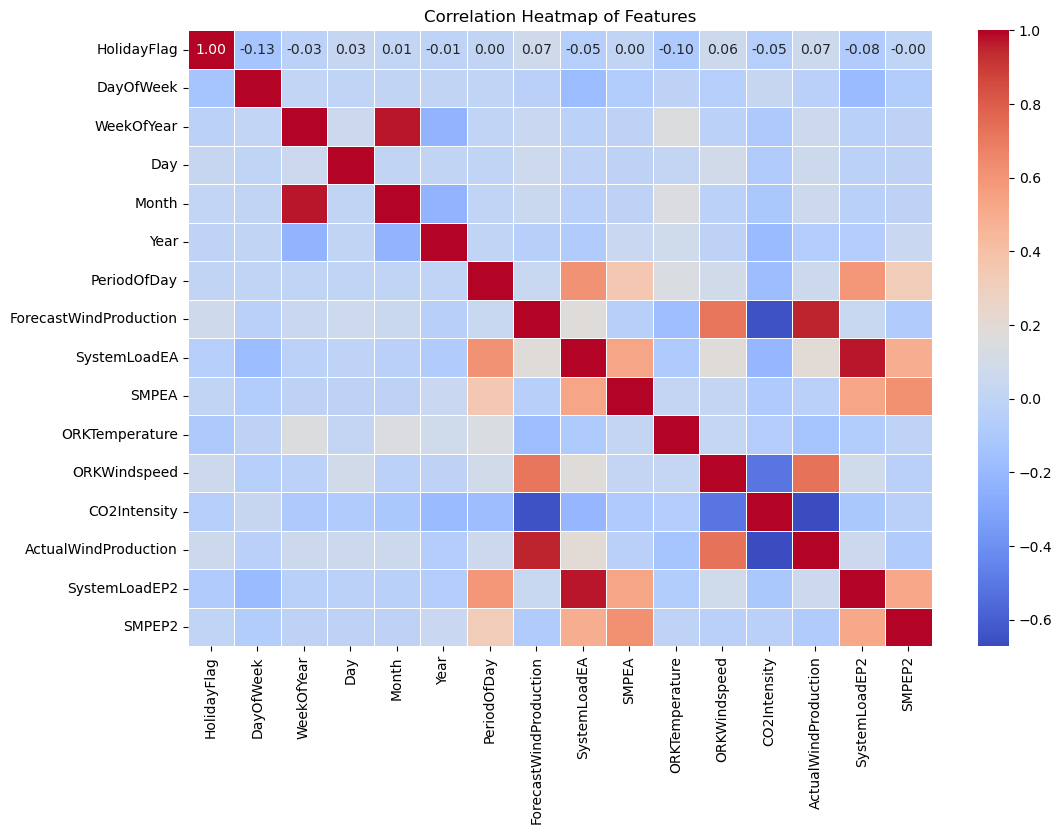

In [6]:
# checkinh the correlation between features

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [7]:
# feature seperation and train test split

from sklearn.model_selection import train_test_split

# seperate x and y
x = df[['SystemLoadEP2', 'ForecastWindProduction', 'ActualWindProduction', 'ORKTemperature', 
        'ORKWindspeed', 'CO2Intensity', 'DayOfWeek', 'PeriodOfDay', 'Month', 'Year']]
y = df['SMPEP2']

# Perform train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(x_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Model Performance:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Linear Regression Model Performance:
Mean Absolute Error (MAE): 16.980658199379594
Mean Squared Error (MSE): 940.173005646968
Root Mean Squared Error (RMSE): 30.66224071471242
R-squared (R2): 0.27616571748206287


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Model Performance:")
print("Mean Absolute Error (MAE):", mae_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2):", r2_rf)


Random Forest Regressor Model Performance:
Mean Absolute Error (MAE): 9.648343876874087
Mean Squared Error (MSE): 581.3953002906912
Root Mean Squared Error (RMSE): 24.11214010183856
R-squared (R2): 0.552386797411162


In [10]:
# Extract date-time components
df['DateTime'] = pd.to_datetime(df['DateTime'], format="%d/%m/%Y %H:%M", errors='coerce')

# Check for any NaT values after parsing
print(df['DateTime'].isna().sum())

# Proceed only if there are no parsing issues
if df['DateTime'].isna().sum() == 0:
    df['Year'] = df['DateTime'].dt.year
    df['Month'] = df['DateTime'].dt.month
    df['Day'] = df['DateTime'].dt.day
    df['Hour'] = df['DateTime'].dt.hour
    df['DayOfWeek'] = df['DateTime'].dt.dayofweek
else:
    print("There are issues with parsing the DateTime column.")


0


In [11]:
# Create lag and rolling features
df['Lag_SMPEA'] = df['SMPEA'].shift(1)
df['Rolling_SMPEA_3h'] = df['SMPEA'].rolling(window=6).mean()

# Interaction features
df['Temp_Wind_Interaction'] = df['ORKTemperature'] * df['ORKWindspeed']

# Drop unnecessary columns
df.drop(columns=['DateTime'], inplace=True)

# Handle missing values if necessary
df.dropna(inplace=True)

x = df.drop(columns=['SMPEP2'])  
y = df['SMPEP2']

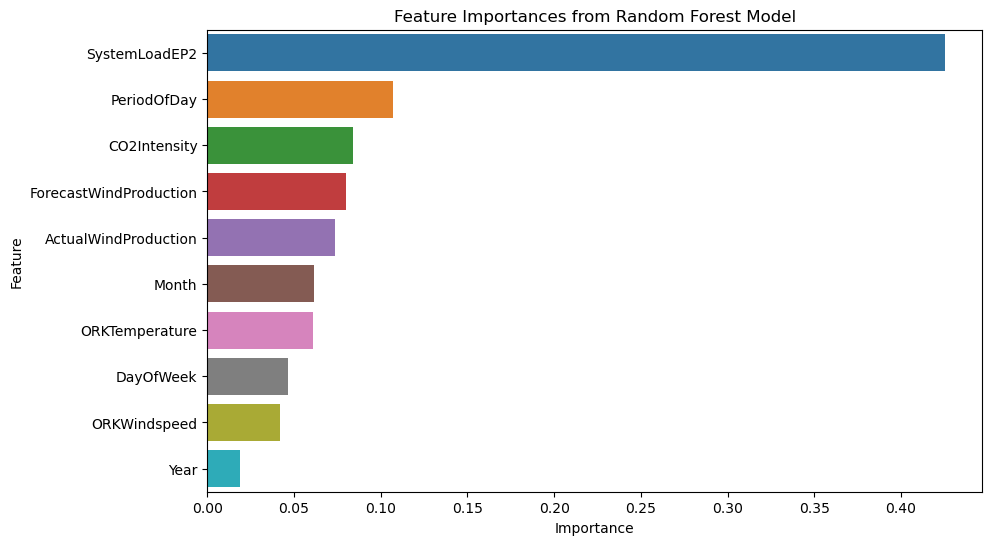

In [12]:
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [13]:
x.columns

Index(['HolidayFlag', 'DayOfWeek', 'WeekOfYear', 'Day', 'Month', 'Year',
       'PeriodOfDay', 'ForecastWindProduction', 'SystemLoadEA', 'SMPEA',
       'ORKTemperature', 'ORKWindspeed', 'CO2Intensity',
       'ActualWindProduction', 'SystemLoadEP2', 'Hour', 'Lag_SMPEA',
       'Rolling_SMPEA_3h', 'Temp_Wind_Interaction'],
      dtype='object')

In [14]:
# Remove low-importance features
low_importance_features = ['WeekOfYear', 'Day', 'SystemLoadEA', 'SMPEA','CO2Intensity', 
                           'SystemLoadEP2','Hour', 'Lag_SMPEA', 'Rolling_SMPEA_3h', 'Temp_Wind_Interaction'] 
x = df.drop(columns=low_importance_features + ['SMPEP2'])

# Separate features and target variable
y = df['SMPEP2']

# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor on the reduced feature set
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# Evaluate model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = rf_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Regressor Model Performance after Feature Selection:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Random Forest Regressor Model Performance after Feature Selection:
Mean Absolute Error (MAE): 9.865585575902335
Mean Squared Error (MSE): 475.0976582595157
Root Mean Squared Error (RMSE): 21.796735036686474
R-squared (R2): 0.6051751435255843


In [15]:
x

,HolidayFlag,DayOfWeek,Month,Year,PeriodOfDay,ForecastWindProduction,ORKTemperature,ORKWindspeed,ActualWindProduction
5,0,1,11,2011,5,342.97,5.0,11.1,342.0
6,0,1,11,2011,6,343.18,5.0,7.4,336.0
7,0,1,11,2011,7,343.46,5.0,9.3,338.0
8,0,1,11,2011,8,343.88,4.0,11.1,347.0
9,0,1,11,2011,9,344.39,4.0,7.4,338.0
...,...,...,...,...,...,...,...,...,...
38009,1,1,12,2013,43,1179.14,6.0,22.2,812.0
38010,1,1,12,2013,44,1152.01,5.0,24.1,852.0
38011,1,1,12,2013,45,1123.67,4.0,20.4,962.0
38012,1,1,12,2013,46,1094.24,5.0,14.8,950.0


In [16]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming your DataFrame 'df' is ready with all features
# 'SMPEP2' is your target variable y
# 'DateTime' has been dropped and all numeric columns are float64

# --- MODEL A (Full Features) ---
x_full = df.drop(columns=['SMPEP2'])
y = df['SMPEP2']

# Store metrics for each fold
r2_full_scores = []
mae_full_scores = []

# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("Evaluating Model A (Full Features) with K-Fold Cross-Validation...")
for train_index, test_index in kf.split(x_full):
    x_train, x_test = x_full.iloc[train_index], x_full.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Random Forest Regressor
    model = RandomForestRegressor(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate and store metrics
    r2_full_scores.append(r2_score(y_test, y_pred))
    mae_full_scores.append(mean_absolute_error(y_test, y_pred))

# --- MODEL B (Selected Features) ---
low_importance_features = ['WeekOfYear', 'Day', 'SystemLoadEA', 'SMPEA', 'CO2Intensity', 
                           'SystemLoadEP2', 'Hour', 'Lag_SMPEA', 'Rolling_SMPEA_3h', 
                           'Temp_Wind_Interaction'] 
x_lean = df.drop(columns=low_importance_features + ['SMPEP2'])
y = df['SMPEP2']

# Store metrics for each fold
r2_lean_scores = []
mae_lean_scores = []

print("\nEvaluating Model B (Selected Features) with K-Fold Cross-Validation...")
for train_index, test_index in kf.split(x_lean):
    x_train, x_test = x_lean.iloc[train_index], x_lean.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and train the Random Forest Regressor
    model = RandomForestRegressor(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Calculate and store metrics
    r2_lean_scores.append(r2_score(y_test, y_pred))
    mae_lean_scores.append(mean_absolute_error(y_test, y_pred))

# --- Compare Results ---
print("\n--- Cross-Validation Results Summary ---")
print("Model A (Full Features):")
print(f"  Average R-squared: {np.mean(r2_full_scores):.4f} +/- {np.std(r2_full_scores):.4f}")
print(f"  Average MAE: {np.mean(mae_full_scores):.4f} +/- {np.std(mae_full_scores):.4f}")

print("\nModel B (Selected Features):")
print(f"  Average R-squared: {np.mean(r2_lean_scores):.4f} +/- {np.std(r2_lean_scores):.4f}")
print(f"  Average MAE: {np.mean(mae_lean_scores):.4f} +/- {np.std(mae_lean_scores):.4f}")

Evaluating Model A (Full Features) with K-Fold Cross-Validation...

Evaluating Model B (Selected Features) with K-Fold Cross-Validation...

--- Cross-Validation Results Summary ---
Model A (Full Features):
  Average R-squared: 0.6122 +/- 0.0349
  Average MAE: 9.1770 +/- 0.2147

Model B (Selected Features):
  Average R-squared: 0.5800 +/- 0.0424
  Average MAE: 10.0423 +/- 0.2669
